# Deep Learning at AdvendtureWorks: Data Preprocessing

In [1]:
from PIL import Image
import cv2
from os import listdir, makedirs
from os.path import join, exists

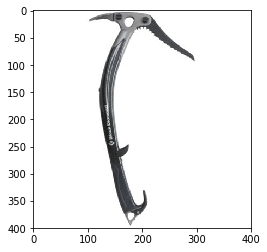

In [19]:
import matplotlib.pyplot as plt

picture = plt.imread("../Data/gear_images/axes/10036053x1012980_zm.jpeg") 

plt.imshow(picture)

In [20]:
import numpy as np

print(type(picture))
print(picture.shape)
print(np.max(picture))
print(np.min(picture))

<class 'numpy.ndarray'>
(400, 400, 3)
255
18


In [23]:
print(picture[1, ])

[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]]


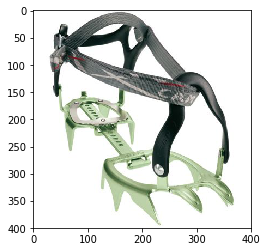

In [10]:
import matplotlib.pyplot as plt

picture = plt.imread("../Data/gear_images/crampons/10045723x1010913_zm.jpeg") 

plt.imshow(picture)

In [11]:
import numpy as np

print(type(picture))
print(picture.shape)
print(np.max(picture))
print(np.min(picture))

<class 'numpy.ndarray'>
(400, 400, 3)
255
0


In [56]:
img = Image.open("../Data/gear_images/crampons/10045723x1010913_zm.jpeg")
print(type(img))
print(img.size)
print(np.max(img))
print(np.min(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(400, 400)
255
0


In [57]:
np.array(img).shape

(400, 400, 3)

In [58]:
old_size = img.size
ratio = float(128)/max(old_size[:2])
new_size = tuple([int(x*ratio) for x in old_size])

In [59]:
new_size

(128, 128)

In [60]:
img = img.resize(new_size, Image.ANTIALIAS)
new_img = Image.new("RGB", (128, 128), "white")

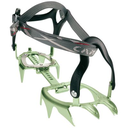

In [61]:
img

In [62]:
np.array(img).shape

(128, 128, 3)

In [63]:
img.size

(128, 128)

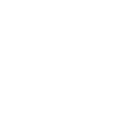

In [64]:
new_img

In [65]:
np.min(np.array(new_img))

255

In [66]:
new_img.paste(img, ((128-new_size[0])//2, (128-new_size[1])//2))
img = cv2.normalize(np.asarray(new_img), np.asarray(new_img), 0, 255, norm_type=cv2.NORM_MINMAX)

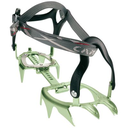

In [67]:
new_img

In [68]:
np.min(np.array(img))

0

In [69]:
new_img.size

(128, 128)

In [70]:
img.size

49152

In [71]:
np.array(new_img).shape

(128, 128, 3)

In [72]:
np.array(img).shape

(128, 128, 3)

In [76]:
###Parcourir les dossiers et tout sauvegarder en npy###

# On process l'image en la resizant à 128*128*3
def preprocess_image(img_path,desired_size=128):
    img = Image.open(img_path)
    old_size = img.size
    ratio = float(desired_size)/max(old_size[:2])
    new_size = tuple([int(x*ratio) for x in old_size])
    img = img.resize(new_size, Image.ANTIALIAS)
    new_img = Image.new("RGB", (desired_size, desired_size), "white")
    if img.mode == 'RGBA':
        new_img.paste(img, ((desired_size-new_size[0])//2, (desired_size-new_size[1])//2), mask=img.split()[3])
    else:
        new_img.paste(img, ((desired_size-new_size[0])//2, (desired_size-new_size[1])//2))
    img = cv2.normalize(np.asarray(new_img), np.asarray(new_img), 0, 255, norm_type=cv2.NORM_MINMAX)
    return np.array(img)

# On parcourt les différents dossiers
def preprocess_folder(folderpath_in, folderpath_out):
    if not exists(folderpath_out):
        makedirs(folderpath_out)
    for imfile in listdir(folderpath_in):
        out_name = '.'.join(imfile.split('.')[:-1]) + '.npy'# on récupère le nom du fichier initial sans l'extension
        img = preprocess_image(join(folderpath_in, imfile))
        np.save(join(folderpath_out, out_name), img)

In [77]:
listdir("../Data/gear_images/")

['axes',
 'boots',
 'carabiners',
 'crampons',
 'gloves',
 'hardshell_jackets',
 'harnesses',
 'helmets',
 'insulated_jackets',
 'pulleys',
 'rope',
 'tents']

In [78]:
root = '../Data/gear_images'
out  = '../Data/gear_images_npy'

if not exists(out):
    makedirs(out)
for fol in listdir(root):
    preprocess_folder(join(root, fol), join(out, fol))